# The Goat versus the King 

**The Greatest Ever! Will data finally put an end to the debate?**

In this notebook I aim to finally measure and put my calculated point into which player is better.

First, let's impor the requiered libraries:


In [3]:
import pandas as pd 
import numpy as np 
import requests
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from nba_api.stats.static import teams
from  nba_api.stats.static import players
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.endpoints import playerprofilev2
from nba_api.stats.endpoints import shotchartdetail

In [4]:
# Next, we define the headers for our API requests: 

headers = {
    'Connection': 'keep-alive',
    'Accept': 'application/json, text/plain, */*',
    'x-nba-stats-token': 'true',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36',
    'x-nba-stats-origin': 'stats',
    'Sec-Fetch-Site': 'same-origin',
    'Sec-Fetch-Mode': 'cors',
    'Referer': 'https://stats.nba.com/',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-US,en;q=0.9',
}


In [4]:
# Define a dictionary to map players IDs to names 
player_names = { 
                893: 'Michael Jordan',
                2544: 'Lebron James',
                200826: 'Jose Juan Barea',
                2306: 'Carlos Arroyo'}


In [6]:
# Get career stasts for LeBron James
lebron_id = '2544'
lebron_career = playercareerstats.PlayerCareerStats(player_id=lebron_id)
lebron_df = lebron_career.get_data_frames()[0]
lebron_df['PLAYER_NAME'] = player_names[2544]

In [7]:

# Get career stats for Michael Jordan 
mj_id = '893'
mj_career = playercareerstats.PlayerCareerStats(player_id=mj_id)
mj_df = mj_career.get_data_frames()[0]
mj_df['PLAYER_NAME'] = player_names[893]


In [8]:
# Get career stats for Jose Juan Barea 
barea_id = '200826'
barea_careeer = playercareerstats.PlayerCareerStats(player_id=barea_id)
barea_df = barea_careeer.get_data_frames()[0]
barea_df['PLAYER_NAME'] = player_names[200826]

# Get career stats for Carlos Arroyo
arroyo_id = '2306'
arroyo_careeer = playercareerstats.PlayerCareerStats(player_id=arroyo_id)
arroyo_df = arroyo_careeer.get_data_frames()[0]
arroyo_df['PLAYER_NAME'] = player_names[2306]




In [70]:


# Get career totals and careers highs for Lebron James 
lebron_career_totals = playerprofilev2.PlayerProfileV2(per_mode36='Totals', player_id=lebron_id).career_totals_regular_season.get_data_frame()
lebron_post_totals = playerprofilev2.PlayerProfileV2(per_mode36='Totals', player_id=lebron_id).career_totals_post_season.get_data_frame()
lebron_career_highs = playerprofilev2.PlayerProfileV2(per_mode36='Totals', player_id=lebron_id).career_highs.get_data_frame() 

# Get career totals and careers highs for Michael Jordan 
jordan_career_totals = playerprofilev2.PlayerProfileV2(per_mode36='Totals', player_id=mj_id).career_totals_regular_season.get_data_frame()
jordan_post_totals = playerprofilev2.PlayerProfileV2(per_mode36='Totals', player_id=mj_id).career_totals_post_season.get_data_frame()
jordan_career_highs = playerprofilev2.PlayerProfileV2(per_mode36='Totals', player_id=mj_id).career_highs.get_data_frame() 

# Get career totals and careers highs for Jose Juan Barea
barea_career_totals = playerprofilev2.PlayerProfileV2(per_mode36='Totals', player_id=barea_id).career_totals_regular_season.get_data_frame()
barea_post_totals = playerprofilev2.PlayerProfileV2(per_mode36='Totals', player_id=barea_id).career_totals_post_season.get_data_frame()
barea_career_highs = playerprofilev2.PlayerProfileV2(per_mode36='Totals', player_id=barea_id).career_highs.get_data_frame() 

# Get career totals and careers highs for Carlos Arroyo
arroyo_career_totals = playerprofilev2.PlayerProfileV2(per_mode36='Totals', player_id=arroyo_id).career_totals_regular_season.get_data_frame()
arroyo_post_totals = playerprofilev2.PlayerProfileV2(per_mode36='Totals', player_id=arroyo_id).career_totals_post_season.get_data_frame()
arroyo_career_highs = playerprofilev2.PlayerProfileV2(per_mode36='Totals', player_id=arroyo_id).career_highs.get_data_frame() 
jordan_career_highs

,PLAYER_ID,GAME_ID,GAME_DATE,VS_TEAM_ID,VS_TEAM_CITY,VS_TEAM_NAME,VS_TEAM_ABBREVIATION,STAT,STAT_VALUE,STAT_ORDER,DATE_EST
0,893,0048509102,APR 20 1986,1610612738,Boston,Celtics,BOS,PTS,63,1,1986-04-20T00:00:00
1,893,0049000050,MAY 14 1991,1610612755,Philadelphia,76ers,PHL,REB,19,2,1991-05-14T00:00:00
2,893,0049100059,MAY 21 1992,1610612739,Cleveland,Cavaliers,CLE,OREB,8,3,1992-05-21T00:00:00
3,893,0049000050,MAY 14 1991,1610612755,Philadelphia,76ers,PHL,DREB,15,4,1991-05-14T00:00:00
4,893,0049200067,JUN 02 1993,1610612752,New York,Knicks,NYK,AST,14,5,1993-06-02T00:00:00
5,893,0049000020,APR 30 1991,1610612752,New York,Knicks,NYK,STL,6,6,1991-04-30T00:00:00
6,893,0048900052,MAY 16 1990,1610612755,Philadelphia,76ers,PHL,STL,6,6,1990-05-16T00:00:00
7,893,0048800041,MAY 13 1989,1610612752,New York,Knicks,NYK,STL,6,6,1989-05-13T00:00:00
8,893,0048700048,MAY 15 1988,1610612765,Detroit,Pistons,DET,STL,6,6,1988-05-15T00:00:00
9,893,0049000059,MAY 25 1991,1610612765,Detroit,Pistons,DET,BLK,5,7,1991-05-25T00:00:00


In [21]:
lebron_career_totals.columns

Index(['PLAYER_ID', 'LEAGUE_ID', 'TEAM_ID', 'GP', 'GS', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [10]:
import random 
import matplotlib.pyplot as plt 

# Define hot zones for LeBron and Jordan
lebron_zones = {'paint': [(0,0), (0,190), (160,190), (160,0), (0,0)],
                'midrange': [(160,190), (240,190), (240,100), (160,100), (160,190)],
                'three': [(240,190), (470,190), (470,0), (240,0), (240,190)]}

jordan_zones = {'paint': [(0,0), (0,140), (140,140), (140,0), (0,0)],
                'midrange': [(140,140), (220,140), (220,60), (140,60), (140,140)],
                'three': [(220,140), (470,140), (470,0), (220,0), (220,140)]}

In [11]:
# Define function to plot hot zones 
def plot_hot_zones(zones):
    for zones, coords in zones.items():
        x, y = zip(*coords)
        plt.plot(x, y, color='gray', linestyle='--')
        


In [78]:
import random
lebron_score = 0 
lebron_wins = 0
lebron_ppg = 0
jordan_score = 0
jordan_wins = 0
jordan_ppg = 0


lebron_pts_maxcap = random.uniform(0, lebron_career_highs.loc[lebron_career_highs['STAT'] == 'PTS', 'STAT_VALUE'].values[0])
lebron_oreb_maxcap = random.uniform(0, lebron_career_highs.loc[lebron_career_highs['STAT'] == 'OREB', 'STAT_VALUE'].values[0])
lebron_dreb_maxcap = random.uniform(0, lebron_career_highs.loc[lebron_career_highs['STAT'] == 'DREB', 'STAT_VALUE'].values[0])
lebron_ast_maxcap = random.uniform(0, lebron_career_highs.loc[lebron_career_highs['STAT'] == 'AST', 'STAT_VALUE'].values[0])
lebron_stl_maxcap = random.uniform(0, lebron_career_highs.loc[lebron_career_highs['STAT'] == 'STL', 'STAT_VALUE'].values[0])
lebron_blk_maxcap = random.uniform(0, lebron_career_highs.loc[lebron_career_highs['STAT'] == 'BLK', 'STAT_VALUE'].values[0])
lebron_fgm_maxcap = random.uniform(0, lebron_career_highs.loc[lebron_career_highs['STAT'] == 'FGM', 'STAT_VALUE'].values[0])
lebron_fga_maxcap = random.uniform(0, lebron_career_highs.loc[lebron_career_highs['STAT'] == 'FGA', 'STAT_VALUE'].values[0])
lebron_fg3m_maxcap = random.uniform(0, lebron_career_highs.loc[lebron_career_highs['STAT'] == 'FG3M', 'STAT_VALUE'].values[0])
lebron_fg3a_maxcap = random.uniform(0, lebron_career_highs.loc[lebron_career_highs['STAT'] == 'FG3A', 'STAT_VALUE'].values[0])
lebron_ftm_maxcap = random.uniform(0, lebron_career_highs.loc[lebron_career_highs['STAT'] == 'FTM', 'STAT_VALUE'].values[0])
lebron_fta_maxcap = random.uniform(0, lebron_career_highs.loc[lebron_career_highs['STAT'] == 'FTA', 'STAT_VALUE'].values[0])

jordan_pts_maxcap = random.uniform(0, jordan_career_highs.loc[jordan_career_highs['STAT'] == 'PTS', 'STAT_VALUE'].values[0])
jordan_oreb_maxcap = random.uniform(0, jordan_career_highs.loc[jordan_career_highs['STAT'] == 'OREB', 'STAT_VALUE'].values[0])
jordan_dreb_maxcap = random.uniform(0, jordan_career_highs.loc[jordan_career_highs['STAT'] == 'DREB', 'STAT_VALUE'].values[0])
jordan_ast_maxcap = random.uniform(0, jordan_career_highs.loc[jordan_career_highs['STAT'] == 'AST', 'STAT_VALUE'].values[0])
jordan_stl_maxcap = random.uniform(0, jordan_career_highs.loc[jordan_career_highs['STAT'] == 'STL', 'STAT_VALUE'].values[0])
jordan_blk_maxcap = random.uniform(0, jordan_career_highs.loc[jordan_career_highs['STAT'] == 'BLK', 'STAT_VALUE'].values[0])
jordan_fgm_maxcap = random.uniform(0, jordan_career_highs.loc[jordan_career_highs['STAT'] == 'FGM', 'STAT_VALUE'].values[0])
jordan_fga_maxcap = random.uniform(0, jordan_career_highs.loc[jordan_career_highs['STAT'] == 'FGA', 'STAT_VALUE'].values[0])
jordan_fg3m_maxcap = random.uniform(0, jordan_career_highs.loc[jordan_career_highs['STAT'] == 'FG3M', 'STAT_VALUE'].values[0])
jordan_fg3a_maxcap = random.uniform(0, jordan_career_highs.loc[jordan_career_highs['STAT'] == 'FG3A', 'STAT_VALUE'].values[0])
jordan_ftm_maxcap = random.uniform(0, jordan_career_highs.loc[jordan_career_highs['STAT'] == 'FTM', 'STAT_VALUE'].values[0])
jordan_fta_maxcap = random.uniform(0, jordan_career_highs.loc[jordan_career_highs['STAT'] == 'FTA', 'STAT_VALUE'].values[0])

games_played = 10000
for i in range(games_played):
    
    # Generate random stats for Lebron James using career highs:
    lebron_pts = random.uniform(0, lebron_career_totals.loc[0, 'PTS'])
    lebron_pts = max(lebron_pts, lebron_pts_maxcap)# Cap it off with career highs    
    lebron_oreb = random.uniform(0, lebron_career_totals.loc[0, 'OREB'])
    lebron_oreb = min(lebron_oreb, lebron_oreb_maxcap)# Cap it off with career highs    
    lebron_dreb = random.uniform(0, lebron_career_totals.loc[0, 'DREB'])
    lebron_dreb = min(lebron_dreb, lebron_dreb_maxcap)# Cap it off with career highs    
    lebron_ast = random.uniform(0, lebron_career_totals.loc[0, 'AST'])
    lebron_ast = min(lebron_ast, lebron_ast_maxcap)# Cap it off with career highs    
    lebron_stl = random.uniform(0, lebron_career_totals.loc[0, 'STL'])
    lebron_stl = min(lebron_stl, lebron_stl_maxcap)# Cap it off with career highs    
    lebron_blk = random.uniform(0, lebron_career_totals.loc[0, 'BLK'])
    lebron_blk = min(lebron_blk, lebron_blk_maxcap)# Cap it off with career highs    
    lebron_fgm = random.uniform(0, lebron_career_totals.loc[0, 'FGM'])
    lebron_fgm = min(lebron_fgm, lebron_fgm_maxcap)# Cap it off with career highs    
    lebron_fga = random.uniform(0, lebron_career_totals.loc[0, 'FGA'])
    lebron_fga = min(lebron_fga, lebron_fga_maxcap)# Cap it off with career highs    
    lebron_fg3m = random.uniform(0, lebron_career_totals.loc[0, 'FG3M'])
    lebron_fg3m = min(lebron_fg3m, lebron_fg3m_maxcap)# Cap it off with career highs    
    lebron_fg3a = random.uniform(0, lebron_career_totals.loc[0, 'FG3A'])
    lebron_fg3a = min(lebron_fg3a, lebron_fg3a_maxcap)# Cap it off with career highs    
    lebron_ftm = random.uniform(0, lebron_career_totals.loc[0, 'FTM'])
    lebron_ftm = min(lebron_ftm, lebron_ftm_maxcap)# Cap it off with career highs    
    lebron_fta = random.uniform(0, lebron_career_totals.loc[0, 'FTA'])
    lebron_fta = min(lebron_fta, lebron_fta_maxcap)# Cap it off with career highs    
    
    
    jordan_pts = random.uniform(0, jordan_career_totals.loc[0, 'PTS'])
    jordan_pts = min(jordan_pts, jordan_pts_maxcap)# Cap it off with career highs    
    jordan_oreb = random.uniform(0, jordan_career_totals.loc[0, 'OREB'])
    jordan_oreb = min(jordan_oreb, jordan_oreb_maxcap)# Cap it off with career highs    
    jordan_dreb = random.uniform(0, jordan_career_totals.loc[0, 'DREB'])
    jordan_dreb = min(jordan_dreb, jordan_dreb_maxcap)# Cap it off with career highs    
    jordan_ast = random.uniform(0, jordan_career_totals.loc[0, 'AST'])
    jordan_ast = min(jordan_ast, jordan_ast_maxcap)# Cap it off with career highs    
    jordan_stl = random.uniform(0, jordan_career_totals.loc[0, 'STL'])
    jordan_stl = min(jordan_stl, jordan_stl_maxcap)# Cap it off with career highs    
    jordan_blk = random.uniform(0, jordan_career_totals.loc[0, 'BLK'])
    jordan_blk = min(jordan_blk, jordan_blk_maxcap)# Cap it off with career highs    
    jordan_fgm = random.uniform(0, jordan_career_totals.loc[0, 'FGM'])
    jordan_fgm = min(jordan_fgm, jordan_fgm_maxcap)# Cap it off with career highs    
    jordan_fga = random.uniform(0, jordan_career_totals.loc[0, 'FGA'])
    jordan_fga = min(jordan_fga, jordan_fga_maxcap)# Cap it off with career highs    
    jordan_fg3m = random.uniform(0, jordan_career_totals.loc[0, 'FG3M'])
    jordan_fg3m = min(jordan_fg3m, jordan_fg3m_maxcap)# Cap it off with career highs    
    jordan_fg3a = random.uniform(0, jordan_career_totals.loc[0, 'FG3A'])
    jordan_fg3a = min(jordan_fg3a, jordan_fg3a_maxcap)# Cap it off with career highs    
    jordan_ftm = random.uniform(0, jordan_career_totals.loc[0, 'FTM'])
    jordan_ftm = min(jordan_ftm, jordan_ftm_maxcap)# Cap it off with career highs    
    jordan_fta = random.uniform(0, jordan_career_totals.loc[0, 'FTA'])
    jordan_fta = min(jordan_fta, jordan_fta_maxcap)# Cap it off with career highs    
    

    # Simulate 4 quarters of a game
    for i in range(4):
        # Simulate player performances
        lebron_score = ((lebron_fgm - lebron_fga) + (lebron_fg3m - lebron_fg3a)) * 0.35 + (lebron_ftm - lebron_fta) / ((jordan_stl + jordan_blk) * -0.5)
        jordan_score = ((jordan_fgm - jordan_fga) + (jordan_fg3m - jordan_fg3a)) * 0.2 + (jordan_ftm - jordan_fta) / ((lebron_stl + lebron_blk) * -0.5)

        # Check who wins this quarter
        if lebron_score > jordan_score:
            lebron_wins += 10
        elif jordan_score > lebron_score:
            jordan_wins += 10

        # Update player stats for next quarter
        lebron_fgm += random.uniform(0.5, 1.5)
        lebron_fga += random.uniform(1.0, 2.0)
        lebron_fg3m += random.uniform(0.1, 0.5)
        lebron_fg3a += random.uniform(0.5, 1.5)
        lebron_ftm += random.uniform(1.0, 2.0)
        lebron_fta += random.uniform(2.0, 3.0)
        lebron_oreb += random.uniform(0.2, 0.8)
        lebron_dreb += random.uniform(1.0, 2.0)
        lebron_blk += random.uniform(0.1, 0.3)
        lebron_stl += random.uniform(0.5, 1.0)

        jordan_fgm += random.uniform(0.5, 1.5)
        jordan_fga += random.uniform(1.0, 2.0)
        jordan_fg3m += random.uniform(0.1, 0.5)
        jordan_fg3a += random.uniform(0.5, 1.5)
        jordan_ftm += random.uniform(1.0, 2.0)
        jordan_fta += random.uniform(2.0, 3.0)
        jordan_oreb += random.uniform(0.2, 0.8)
        jordan_dreb += random.uniform(1.0, 2.0)
        jordan_blk += random.uniform(0.1, 0.3)
        jordan_stl += random.uniform(0.5, 1.0)

        #Calculate final scores

        lebron_score += ((lebron_fgm - lebron_fga) + (lebron_fg3m - lebron_fg3a)) * .5 + (lebron_ftm - lebron_fta) / ((jordan_stl + jordan_blk)-0.5)
        jordan_score += ((jordan_fgm - jordan_fga) + (jordan_fg3m - jordan_fg3a)) * .2 + (jordan_ftm - jordan_fta) / ((lebron_stl + lebron_blk)-0.5)

        #Check who wins this game

        if lebron_score > jordan_score:
            lebron_wins += 1
        else:
            jordan_wins += 1
        
        num_games = (i + 1)

        #Calculate PPG for each player

        lebron_ppg = lebron_score / num_games
        jordan_ppg = jordan_score / num_games

        #Calculate rebounds per game

        lebron_oreb_per_game = lebron_oreb / num_games
        jordan_oreb_per_game = jordan_oreb / num_games
        lebron_dreb_per_game = lebron_dreb / num_games
        jordan_dreb_per_game = jordan_dreb / num_games

        #Calculate 3-pointers per game

        lebron_3pt_per_game = lebron_fg3m / num_games
        jordan_3pt_per_game = jordan_fg3m / num_games

        #Calculate blocks per game

        lebron_blk_per_game = lebron_blk / num_games
        jordan_blk_per_game = jordan_blk / num_games

        #Calculate steals per game

        lebron_stl_per_game = lebron_stl / num_games
        jordan_stl_per_game = jordan_stl / num_games

        #Print the results
        games_totals = (games_played + num_games)
        print("Simulated Games:", games_totals)
        print("LeBron wins:", lebron_wins, "Jordan wins:", jordan_wins)
#        print("LeBron (PPG) Points per Game:", format(lebron_ppg, '.2f'), "Jordan (PPG) Points per Game:", format(jordan_ppg, '.2f'))
#        print("LeBron Offensive Rebounds per game:", format(lebron_oreb_per_game, '.2f'), "Jordan Offensive Rebounds per game:", format(jordan_oreb_per_game, '.2f'))
#        print("Lebron Defensive Rebounds per game:", format(lebron_dreb_per_game, '.2f'), "Jordan Defensive Rebounds per game:", format(jordan_dreb_per_game, '.2f'))
#        print("LeBron 3-pointers per game:", format(lebron_3pt_per_game, '.2f'), "Jordan 3-pointers per game:", format(jordan_3pt_per_game, '.2f'))
#        print("LeBron Blocks per game:", format(lebron_blk_per_game, '.2f'), "Jordan Blocks per game:", format(jordan_blk_per_game, '.2f'))
#        print("LeBron Steals per game:", format(lebron_stl_per_game, '.2f'), "Jordan Steals per game:", format(jordan_stl_per_game, '.2f'))


Simulated Games: 10001
LeBron wins: 11 Jordan wins: 0
Simulated Games: 10002
LeBron wins: 22 Jordan wins: 0
Simulated Games: 10003
LeBron wins: 33 Jordan wins: 0
Simulated Games: 10004
LeBron wins: 44 Jordan wins: 0
Simulated Games: 10001
LeBron wins: 55 Jordan wins: 0
Simulated Games: 10002
LeBron wins: 66 Jordan wins: 0
Simulated Games: 10003
LeBron wins: 77 Jordan wins: 0
Simulated Games: 10004
LeBron wins: 88 Jordan wins: 0
Simulated Games: 10001
LeBron wins: 99 Jordan wins: 0
Simulated Games: 10002
LeBron wins: 110 Jordan wins: 0
Simulated Games: 10003
LeBron wins: 121 Jordan wins: 0
Simulated Games: 10004
LeBron wins: 132 Jordan wins: 0
Simulated Games: 10001
LeBron wins: 143 Jordan wins: 0
Simulated Games: 10002
LeBron wins: 154 Jordan wins: 0
Simulated Games: 10003
LeBron wins: 165 Jordan wins: 0
Simulated Games: 10004
LeBron wins: 176 Jordan wins: 0
Simulated Games: 10001
LeBron wins: 187 Jordan wins: 0
Simulated Games: 10002
LeBron wins: 198 Jordan wins: 0
Simulated Games: 10

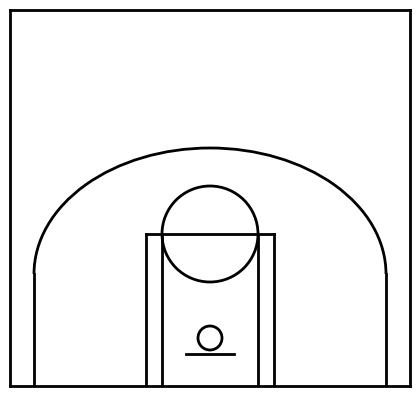

NameError: name 'shotchartdetail' is not defined

In [1]:
import matplotlib.colors as colors
import matplotlib.patches as mpatches
from create_court import create_court
# Get shot data for Carlos Arroyo in the 2009-10 season
arroyo_shot_data = shotchartdetail.ShotChartDetail(player_id='2306', team_id='1610612748', season_nullable='2009-10').get_data_frames()[0]


# call the function 
create_court()

